In [ ]:
from google.colab import drive
drive.mount('/content/drive')

100%|██████████| 4000/4000 [15:40<00:00,  4.25it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


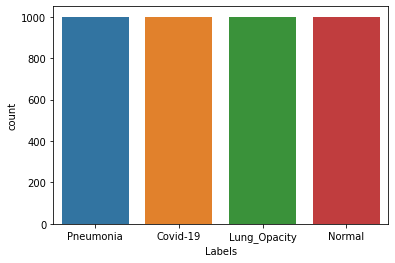

Covid-19: 1000
Normal: 1000
Pneumonia:  1000
Lung_Opacity:  1000


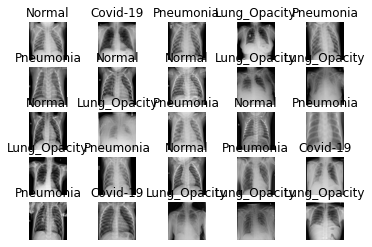

['Covid-19' 'Lung_Opacity' 'Normal' 'Pneumonia']
[0. 0. 0. 1.]
(3200, 150, 150, 3)
(800, 150, 150, 3)
(3200, 4)
(800, 4)
9412608/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_rel

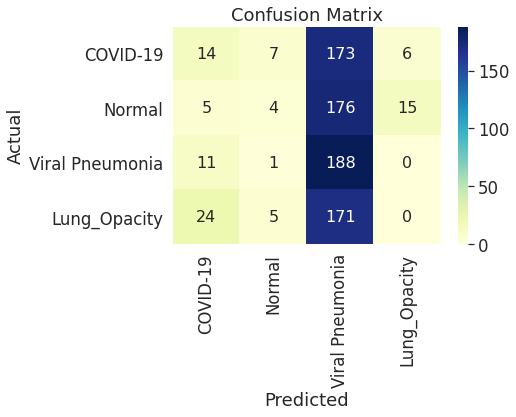

##### Plot the training loss and accuracy #####
Epoch 1/10
80/80 [==============================] - 292s 4s/step - loss: 0.4161 - accuracy: 0.7947 - val_loss: 0.7586 - val_accuracy: 0.3300
Epoch 2/10
80/80 [==============================] - 284s 4s/step - loss: 0.2167 - accuracy: 0.9028 - val_loss: 1.0197 - val_accuracy: 0.3575
Epoch 3/10
80/80 [==============================] - 284s 4s/step - loss: 0.1548 - accuracy: 0.9231 - val_loss: 1.2563 - val_accuracy: 0.4112
Epoch 4/10
80/80 [==============================] - 284s 4s/step - loss: 0.1146 - accuracy: 0.9409 - val_loss: 1.0601 - val_accuracy: 0.5125
Epoch 5/10
80/80 [==============================] - 282s 4s/step - loss: 0.0859 - accuracy: 0.9500 - val_loss: 1.0703 - val_accuracy: 0.5337
Epoch 6/10
80/80 [==============================] - 281s 4s/step - loss: 0.0794 - accuracy: 0.9581 - val_loss: 0.8087 - val_accuracy: 0.6062
Epoch 7/10
80/80 [==============================] - 282s 4s/step - loss: 0.0674 - accuracy: 0.9619 - val_l

KeyError: ignored

<Figure size 432x288 with 0 Axes>

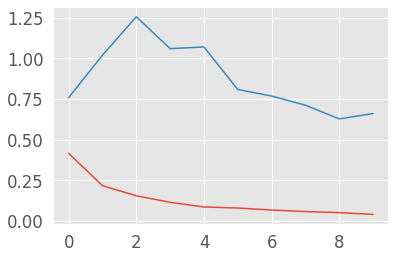

In [ ]:


# -*- coding: utf-8 -*-

#Code : help:https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part3.ipynb#scrollTo=Cj4rXshqbQlS
"""classification-of-covid-19-using-cnn.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Rh1PQmp3fvMAuhML_k2HUQ2qq21nSg-E
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image:
# https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter)
# will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames
          #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/)
# that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/,
# but they won't be saved outside of the current session

"""# import Libraries"""
"""# import Libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm

from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
#      DATA PREPARATION   ######
"""# ****Explorer****"""
'''
os.listdir('/kaggle/input')

os.listdir('/kaggle/input/covid19-radiography-database')

os.listdir('/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database')
'''
#os.listdir('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset')
os.listdir('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset')
#D:/DOWNLOAD/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset
# Image paths

imagePaths = []
#for dirname, _, filenames in os.walk('/kaggle/input'):
#for dirname, _, filenames in os.walk('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset'):
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

# Data - Label

Data = []
Target = []
resize = 150
#cat = {'Viral Pneumonia': 'Pneumonia', 'NORMAL': 'Normal', 'COVID-19': 'Covid-19'}
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

# Count by Label

df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
#plt.figure(figsize=(20,20))
plt.show()
plt.savefig("ClassLevelplot.png")

print('Covid-19:',Target.count('Covid-19'))
print('Normal:',Target.count('Normal'))
print('Pneumonia: ',Target.count('Pneumonia'))
print('Lung_Opacity: ',Target.count('Lung_Opacity'))


# Images shape

size = []
for file in imagePaths:
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

# Show Images

#plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) :
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')
plt.show()
plt.savefig("ImageCategoryplot.png")

"""# Prepare Data"""

# encode labels as integers

le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

# split Data

(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

trainX[0]
######## End of data preparation #############

## MobileNet model #########
# Source code: https://www.kaggle.com/wuzongtai/transfer-learning-with-keras-and-mobilenet-v2
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
#os.environ["AUTOGRAPH_VERBOSITY"] = "10"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

from platform import python_version
import warnings
import time
import datetime as dt
from sklearn.metrics import classification_report, confusion_matrix
import multiprocessing as mp
import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *

import pandas as pd
import numpy as np
import seaborn as sn

from PIL import Image
import xml.etree.ElementTree as ET
import psutil
import random

warnings.filterwarnings("ignore")
'''
targetx = 224
targety = 224
learning_rate = 0.0001
classes = 120
'''
seed = random.randint(1, 1000)
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
#base_model = MobileNet(include_top=False, weights='None', input_shape=(150, 150, 3))
#base_model.load_weights('mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_192_no_top.h5')
x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Dropout(rate = .2)(x)
x = BatchNormalization()(x)
x = Dense(1280, activation='relu',  kernel_initializer=glorot_uniform(seed), bias_initializer='zeros')(x)
# x = Dropout(rate = .2)(x)
x = BatchNormalization()(x)
predictions = Dense(4, activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros')(x)

model = Model(inputs=base_model.input, outputs=predictions)

#optimizer = Adam(lr=learning_rate)
# optimizer = RMSprop(lr=learning_rate)

#loss = "categorical_crossentropy"
# loss = "kullback_leibler_divergence"

#for layer in model.layers:
    #layer.trainable = True
# for layer in model.layers[-2:]:
#     layer.trainable = True
#model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

model.summary()
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['acc'])


#  RESULT ANALYSIS SECTION

modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

# classification report on train
batch_size=40
epochs=10
print("Train classification report on train data section")
predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# classification report on test

print("Test classification report on test data section")
predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()
plt.savefig("Confusion Matrix plot.png")

#model.save('CNN_Covid19_Xray_V1.h5')


#'''Visualization'''
# plot the training loss and accuracy
print("##### Plot the training loss and accuracy #####")
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=batch_size),
    steps_per_epoch=len(trainX) // batch_size,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch_size,
    epochs=epochs)

#N = EPOCHS
N=epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig("Acc Loss plot.png")


